In [1]:
import torch
import pandas as pd
import sklearn as skl
import matplotlib as plt
import matplotlib.pyplot as pplot

In [2]:
data = pd.read_csv('../../data/Iris_Species/Iris.csv')

data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor


In [3]:
def to_numerical_category(name):
    if name == 'Iris-setosa':
        return 0
    elif name == 'Iris-versicolor':
        return 1
    elif name == 'Iris-virginica':
        return 2
    else:
        raise NotImplementedError

In [4]:
data = skl.utils.shuffle(data)

label = [to_numerical_category(name) for name in data['Species']]

In [5]:
data = data.drop(columns=['Id', 'Species'])
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
57,4.9,2.4,3.3,1.0
9,4.9,3.1,1.5,0.1
68,6.2,2.2,4.5,1.5
140,6.7,3.1,5.6,2.4
71,6.1,2.8,4.0,1.3


'init_center'

tensor([[ 0.2174,  0.1721],
        [ 1.9724, -0.6574]])

[tensor([0.6526, 1.6696]), tensor([2.2843, 0.5240])]

[tensor(1133.7469), tensor(187.7549)]

[tensor([0.6371, 1.9329]), tensor([1.7007, 0.2152])]

[tensor(628.0853), tensor(219.7962)]

[tensor([0.9882, 2.5546]), tensor([ 0.7921, -0.2567])]

[tensor(478.9196), tensor(261.7188)]

[tensor([1.4869, 2.9618]), tensor([ 0.2672, -0.1776])]

[tensor(277.3930), tensor(199.8920)]

[tensor([1.6061, 3.0496]), tensor([ 0.2212, -0.0770])]

[tensor(200.6866), tensor(190.0412)]

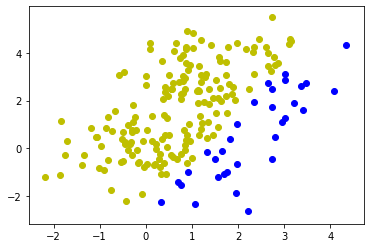

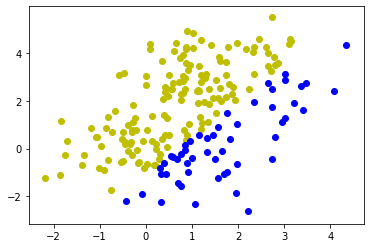

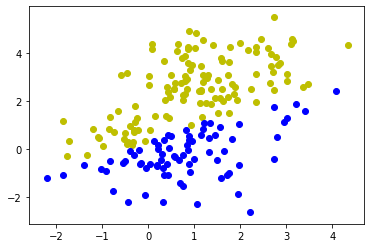

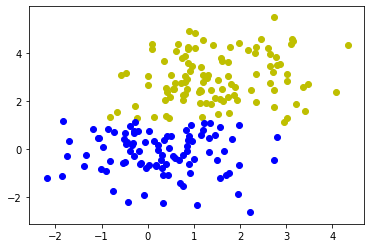

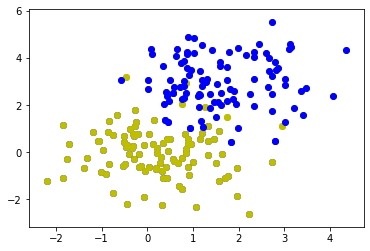

In [11]:
def k_means(K, data, epochs):
    centers = data[:K]  # 3 centers in 4 Dimension
    
    display('init_center', centers)
    
    prev_loss = None
    
    for i in range(epochs):
        output = torch.stack([center - data for center in centers])
        distance = (output ** 2).sum(-1)

        min_distance, closest_center = distance.min(0)

        centers = [data[[closest_center[:] == i]].mean(0) for i in range(K)]
        display(centers)

        loss = [min_distance[[closest_center[:] == i]].sum() for i in range(K)]
        display(loss)
        loss = torch.stack(loss).sum()
        
        torch.t(data[[closest_center[:] == i]]).numpy()
        
        pplot.figure()
        pplot.scatter(*torch.t(data[[closest_center[:] == 0]]).numpy(), c='y')
        pplot.scatter(*torch.t(data[[closest_center[:] == 1]]).numpy(), c='b')
        
        if prev_loss is not None and abs(prev_loss - loss) < 1e-2:
            return centers
        else:
            prev_loss = loss

    return centers


data1 = torch.randn(100, 2)
data2 = torch.randn(100, 2)

data2 += torch.tensor([0, 1.5], dtype=torch.float32)
data2 += torch.tensor([1.5, 1.5], dtype=torch.float32)

data = torch.cat([data1, data2])

data1_scatt1 = torch.t(data1).numpy()
data1_scatt2 = torch.t(data2).numpy()

centers = k_means(2, data, 5)


pplot.scatter(*data1_scatt1, c='y')
pplot.scatter(*data1_scatt2, c='b')


centers_scatt = [torch.t(center).numpy() for center in centers]

# display(centers)
# display(centers_scatt)

# pplot.scatter(centers_scatt[0], centers_scatt[1], c='r')